In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
data_path = 'C:/Users/Jesse/Desktop/midterm_data/data/'
flights_df = pd.read_csv(data_path + 'flights.csv')

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?



- A short-haul flight is one of up to 3 hours in duration. 
- Medium-haul flights take 3-6 hours. 
- A long-haul flight runs for 6-12 hours, whilst an ultra-long-haul flight is in the air for over 12 hours.

In [4]:
flights_df = flights_df.loc[(flights_df['air_time'].notna()) & (flights_df['cancelled'] == 0)]

In [5]:
flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'], format='%Y-%m-%d')

In [6]:
def convert_time_to_string(x):
    if np.isnan(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'
    
    string = str(int(x))
    
    if len(string) < 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [7]:
flights_df['dep_time'] = flights_df['dep_time'].apply(lambda x: convert_time_to_string(x))
flights_df['dep_time'] = pd.to_datetime(flights_df['dep_time'], format='%H:%M')
flights_df['dep_hr'] = flights_df['dep_time'].dt.hour

In [8]:
def get_haul(x):
    x = x/60
    if x < 3:
        return 'SHORT'
    elif x >= 3 and x < 6:
        return 'MEDIUM'
    elif x >= 6 and x < 12:
        return 'LONG'
    elif x >= 12:
        return 'ULTRA LONG'
    
flights_df['haul'] = flights_df['air_time'].apply(lambda x: get_haul(x))

In [20]:
x = flights_df.groupby(['dep_hr', 'haul']).count()


fl_date  mkt_unique_carrier  branded_code_share  mkt_carrier  \
dep_hr haul                                                                   
0      LONG        123                 123                 123          123   
       MEDIUM    28378               28378               28378        28378   
       SHORT     36045               36045               36045        36045   
1      LONG        234                 234                 234          234   
       MEDIUM     9624                9624                9624         9624   
...                ...                 ...                 ...          ...   
22     MEDIUM    76762               76762               76762        76762   
       SHORT    364127              364127              364127       364127   
23     LONG        216                 216                 216          216   
       MEDIUM    65910               65910               65910        65910   
       SHORT     98192               98192               98192        98192   

               mkt_carrier_fl_num  op_unique_carrier  tail_num  \
dep_hr haul                                                      
0      LONG                   123                123       123   
       MEDIUM               28378              28378     28378   
       SHORT                36045              36045     36045   
1      LONG                   234                234       234   
       MEDIUM                9624               9624      9624   
...                           ...                ...       ...   
22     MEDIUM               76762              76762     76762   
       SHORT               364127             364127    364127   
23     LONG                   216                216       216   
       MEDIUM               65910              65910     65910   
       SHORT                98192              98192     98192   

               op_carrier_fl_num  origin_airport_id  origin  ...  distance  \
dep_hr haul                                                  ...             
0      LONG                  123                123     123  ...       123   
       MEDIUM              28378              28378   28378  ...     28378   
       SHORT               36045              36045   36045  ...     36045   
1      LONG                  234                234     234  ...       234   
       MEDIUM               9624               9624    9624  ...      9624   
...                          ...                ...     ...  ...       ...   
22     MEDIUM              76762              76762   76762  ...     76762   
       SHORT              364127             364127  364127  ...    364127   
23     LONG                  216                216     216  ...       216   
       MEDIUM              65910              65910   65910  ...     65910   
       SHORT               98192              98192   98192  ...     98192   

               carrier_delay  weather_delay  nas_delay  security_delay  \
dep_hr haul                                                              
0      LONG               74             74         74              74   
       MEDIUM           9944           9944       9944            9944   
       SHORT           22876          22876      22876           22876   
1      LONG               87             87         87              87   
       MEDIUM           4942           4942       4942            4942   
...                      ...            ...        ...             ...   
22     MEDIUM          17205          17205      17205           17205   
       SHORT          122556         122556     122556          122556   
23     LONG              182            182        182             182   
       MEDIUM          14393          14393      14393           14393   
       SHORT           67186          67186      67186           67186   

               late_aircraft_delay  first_dep_time  total_add_gtime  \
dep_hr haul                                                           
0      L

In [22]:
x.reset_index(inplace=True)


[Text(0, 0.5, 'Number of Flights'),
 Text(0.5, 0, 'Hour of day (24hrs)'),
 Text(0.5, 1.0, 'Short Hauls vs Departure Time (24hr)')]

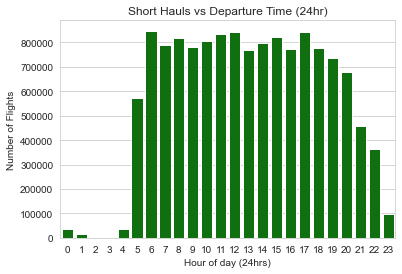

In [63]:
sns.set_style("whitegrid")
sns.color_palette("PuBuGn_d")
ax1 = sns.barplot(x='dep_hr', y='fl_date', data=x.loc[x['haul'] == 'SHORT'], color='green');

ax1.set(title='Short Hauls vs Departure Time (24hr)', xlabel='Hour of day (24hrs)', ylabel='Number of Flights')

[Text(0, 0.5, 'Number of Flights'),
 Text(0.5, 0, 'Hour of day (24hrs)'),
 Text(0.5, 1.0, 'Medium Hauls vs Departure Time (24hr)')]

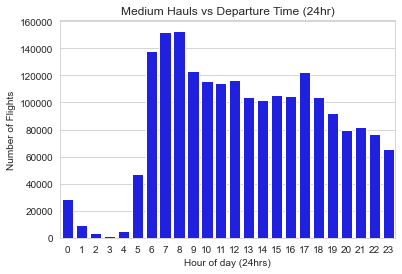

In [64]:
ax2 = sns.barplot(x='dep_hr', y='fl_date', data=x.loc[x['haul'] == 'MEDIUM'], color='blue')
ax2.set(title='Medium Hauls vs Departure Time (24hr)', xlabel='Hour of day (24hrs)', ylabel='Number of Flights')

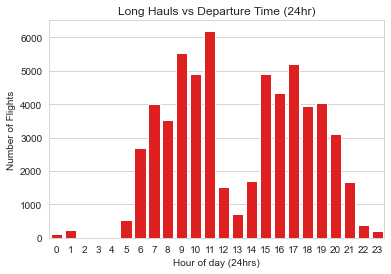

In [66]:
ax3 = sns.barplot(x='dep_hr', y='fl_date', data=x.loc[x['haul'] == 'LONG'], color='red')
ax3.set(title='Long Hauls vs Departure Time (24hr)', xlabel='Hour of day (24hrs)', ylabel='Number of Flights');